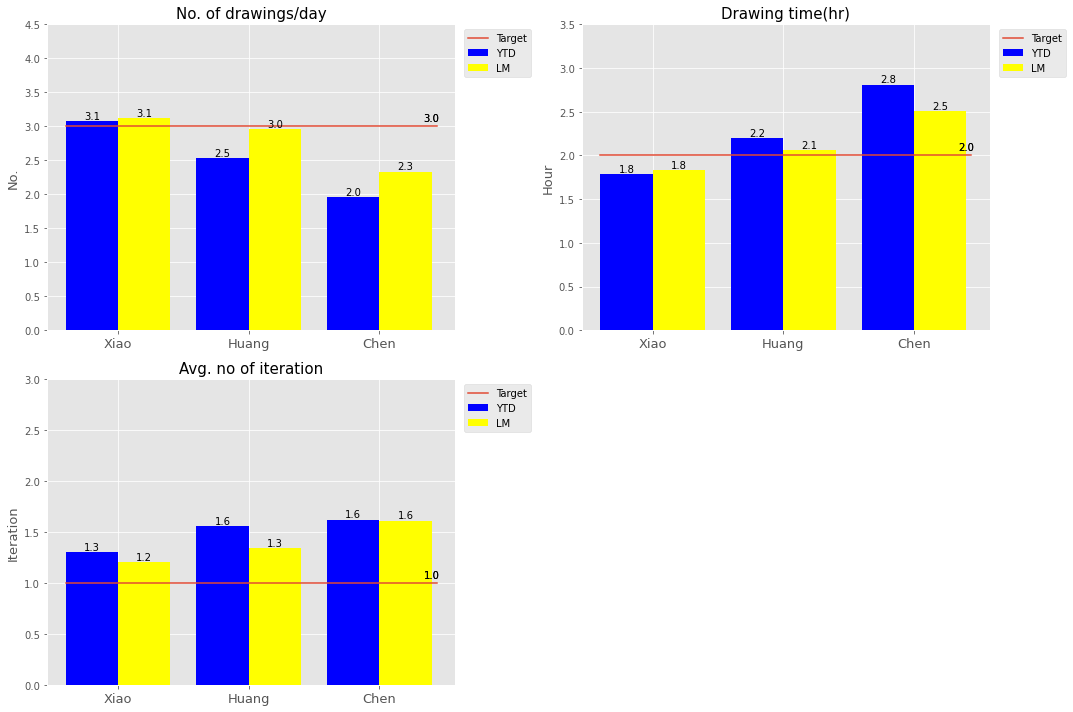

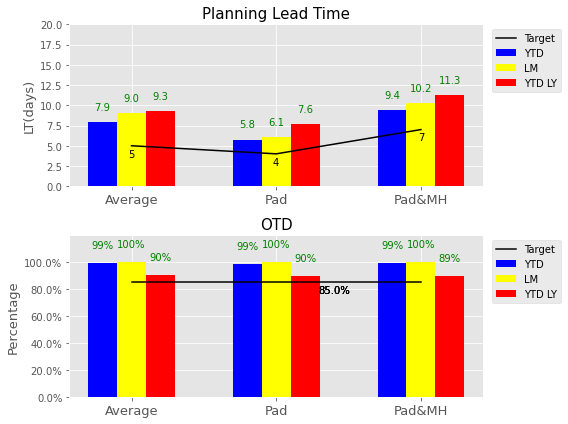

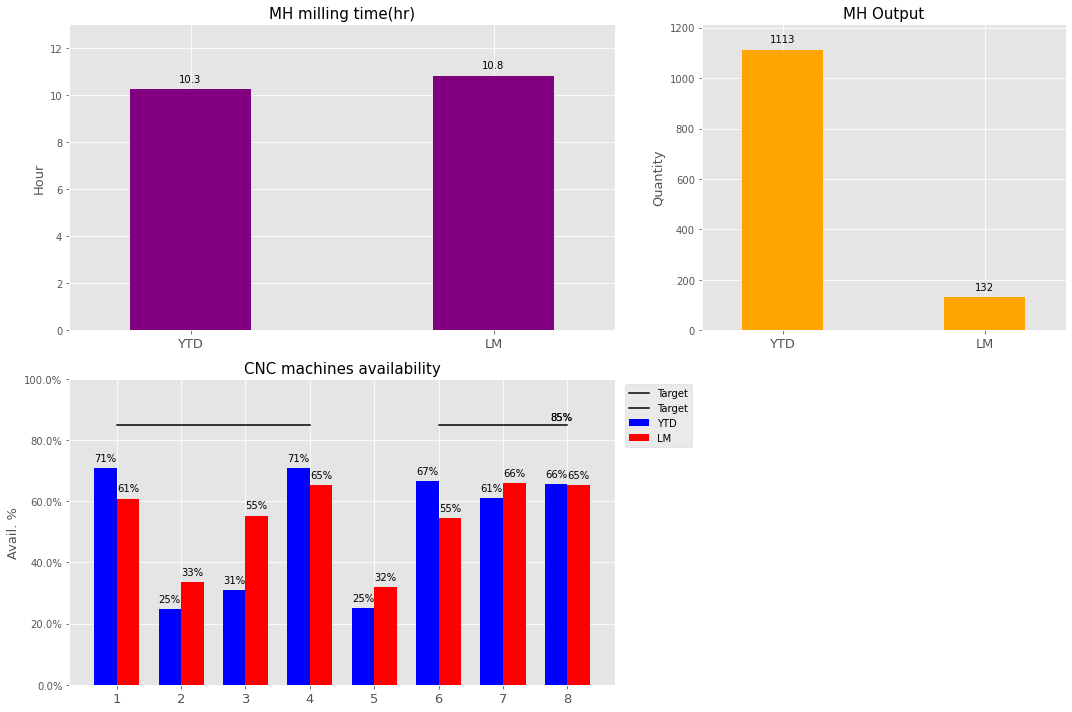

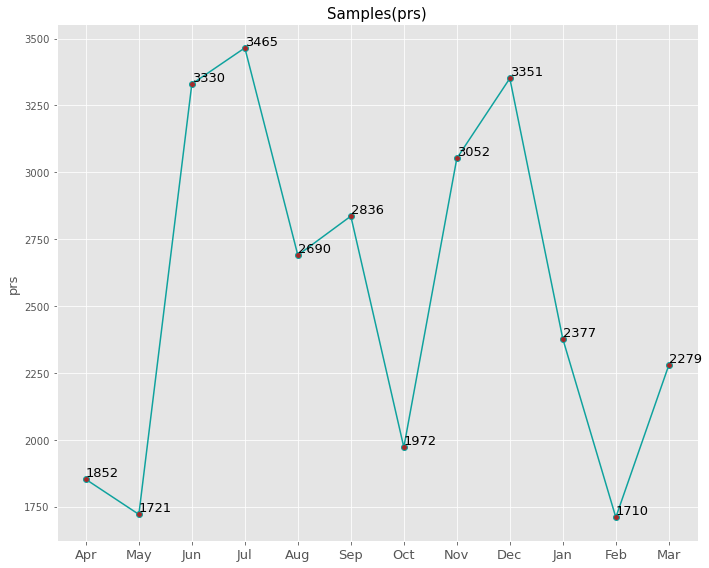

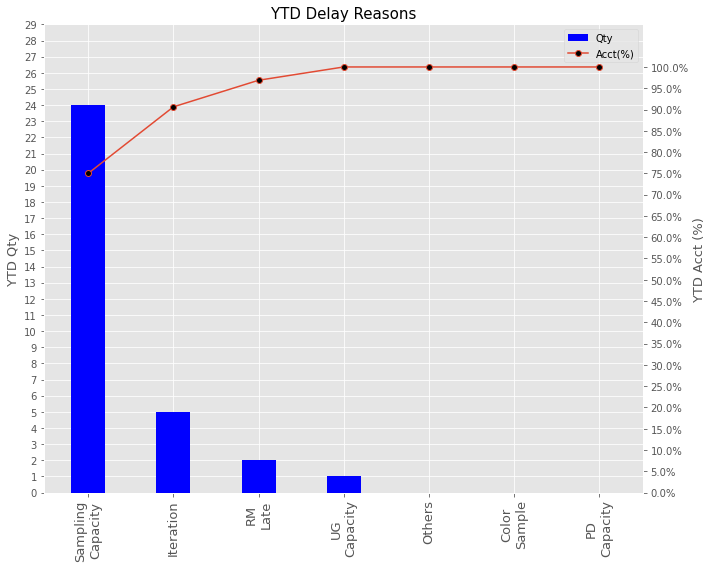

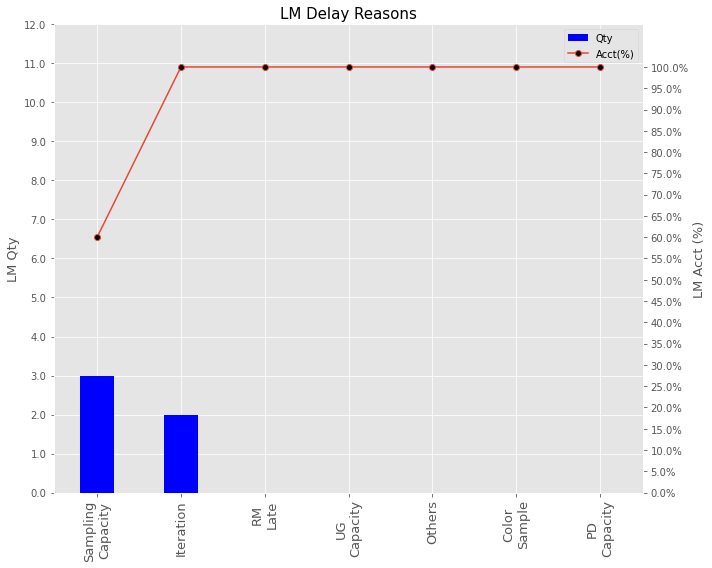

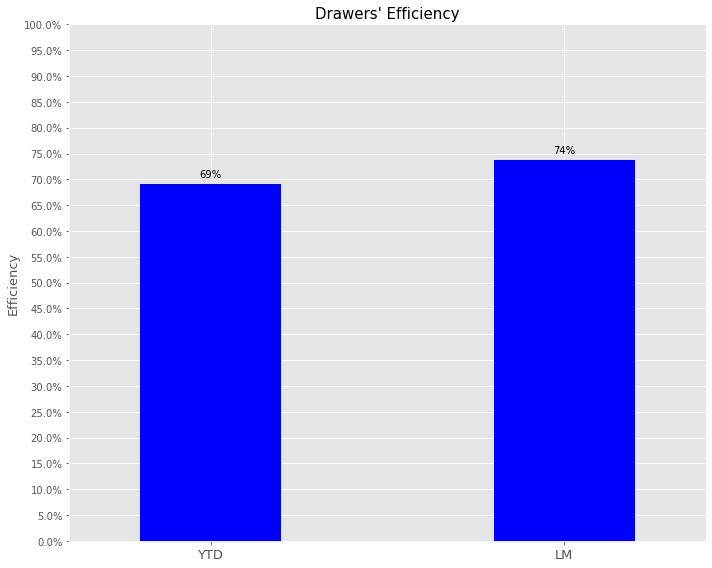

In [1]:
from simple_smartsheet import Smartsheet  # new library found to convert ss data into dataframe
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

from pptx import Presentation  # python-pptx library
from pptx.util import Inches

plt.style.use('ggplot')
import numpy as np

smartsheet = Smartsheet('****')

# ug kpi sheet
sheet_ug = smartsheet.sheets.get(id=7622326427641732)

df_ug = sheet_ug.as_dataframe()
drawers_eff = df_ug.loc[18, 'YTD':'LM']

# Planning kpi sheet
sheet_pln = smartsheet.sheets.get(id=5415400432265092)
df_pln = sheet_pln.as_dataframe()

# sampling kpis
sheet_smpl = smartsheet.sheets.get(id=5902563640928132)
df_smpl = sheet_smpl.as_dataframe()

# drawing per day kpi
labels = ['Xiao', 'Huang', 'Chen']
drawing_pday_ytd = df_ug.loc[4:6, 'YTD']
drawing_pday_lm = df_ug.loc[4:6, 'LM']

# drawing hr kpi
drawing_hr_ytd = df_ug.loc[9:11, 'YTD']
drawing_hr_lm = df_ug.loc[9:11, 'LM']

# avg iteration
avg_iter_ytd = df_ug.loc[14:16, 'YTD']
avg_iter_lm = df_ug.loc[14:16, 'LM']

# planning
pln_lt_data = df_pln.loc[0:2, 'YTD 2020 LT':'YTD LY LT']
pln_lt_data2 = df_pln.loc[0:2, 'YTD 2020 OTD':'YTD LY OTD']
labels2 = ['Average', 'Pad', 'Pad&MH']

# cnc data
sheet_cnc = smartsheet.sheets.get(id=8799147466745732)
df_cnc = sheet_cnc.as_dataframe()
df_mh_lt = df_cnc.loc[7, 'YTD':'LM']
df_mh_output = df_cnc.loc[1, 'YTD':'LM']
df_machine_ava = df_cnc.loc[10:17, 'YTD':'LM']

x = np.linspace(0.0, 0.5, num=3)  # the label locations
width = 0.1  # the width of the bars
width2 = 0.04
width3 = 0.04
x1 = np.linspace(x.min() - width, x.max() + 1.1 * width, num=3)
x3 = np.linspace(0.2, 0.3, num=2)
x4 = np.linspace(0.0, 0.8, num=8)

labels3 = ['YTD', 'LM']

# delay reason
sheet_del_res = smartsheet.sheets.get(id=398391252412292)
df_del_res = sheet_del_res.as_dataframe()

# create figs and axs
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
axs[1, 1].remove()
fig2, axs2 = plt.subplots(ncols=1, nrows=2, figsize=(8, 6))
fig3, axs3 = plt.subplots(ncols=2, nrows=2,gridspec_kw={'width_ratios': [1.5, 1]},figsize=(15, 10))
axs3[1, 1].remove()


fig4, axs4 = plt.figure(figsize=(10, 8)), plt.axes()

fig5, axs5 = plt.subplots(figsize=(10, 8))
axs6 = axs5.twinx()
axs6.grid(False)

fig6, axs7 = plt.subplots(figsize=(10, 8))
axs8 = axs7.twinx()
axs8.grid(False)

fig7, axs9 = plt.subplots(figsize=(10, 8))

# bar charts
rects1 = axs[0, 0].bar(x - width / 2, drawing_pday_ytd, width, label='YTD', color='blue')
rects2 = axs[0, 0].bar(x + width / 2, drawing_pday_lm, width, label='LM', color='yellow')
rects3 = axs[0, 1].bar(x - width / 2, drawing_hr_ytd, width, label='YTD', color='blue')
rects4 = axs[0, 1].bar(x + width / 2, drawing_hr_lm, width, label='LM', color='yellow')
rects5 = axs[1, 0].bar(x - width / 2, avg_iter_ytd, width, label='YTD', color='blue')
rects6 = axs[1, 0].bar(x + width / 2, avg_iter_lm, width, label='LM', color='yellow')
rects7 = axs2[0].bar(x - 0.5 * width, pln_lt_data.loc[:, 'YTD 2020 LT'], 0.5 * width, label='YTD', color='blue')
rects8 = axs2[0].bar(x, pln_lt_data.loc[:, 'LM 2020 LT'], 0.5 * width, label='LM', color='yellow')
rects9 = axs2[0].bar(x + 0.5 * width, pln_lt_data.loc[:, 'YTD LY LT'], 0.5 * width, label='YTD LY', color='red')
rects10 = axs2[1].bar(x - 0.5 * width, pln_lt_data2.loc[:, 'YTD 2020 OTD'], 0.5 * width, label='YTD', color='blue')
rects11 = axs2[1].bar(x, pln_lt_data2.loc[:, 'LM OTD'], 0.5 * width, label='LM ', color='yellow')
rects12 = axs2[1].bar(x + 0.5 * width, pln_lt_data2.loc[:, 'YTD LY OTD'], 0.5 * width, label='YTD LY', color='red')
rects13 = axs3[0, 0].bar(x3, df_mh_lt, width2, color='purple')
rects14 = axs3[0, 1].bar(x3, df_mh_output, width2, color='orange')
rects15 = axs3[1, 0].bar(x4 - width3 / 2, df_machine_ava['YTD'], width3, label='YTD', color='blue')
rects16 = axs3[1, 0].bar(x4 + width3 / 2, df_machine_ava['LM'], width3, label='LM', color='red')
rects17 = axs5.bar(list(range(7)), df_del_res['YTD Qty'].dropna(), 0.4, color='b', label='Qty')
rects18 = axs7.bar(list(range(7)), df_del_res['LM Qty'].dropna(), 0.4, color='b', label='Qty')
rects19 = axs9.bar(x3, drawers_eff, width2, color='b')

ln1 = axs[0, 0].plot(x1, [3, 3, 3], label='Target')
ln2 = axs[0, 1].plot(x1, [2, 2, 2], label='Target')
ln3 = axs[1, 0].plot(x1, [1, 1, 1], label='Target')
ln4 = axs2[0].plot(x, [5, 4, 7], label='Target', color='black')
ln5 = axs2[1].plot(x, [0.85, 0.85, 0.85], label='Target', color='black')
yihfk=x4[5:]
dfkfhk=x4[0:4]
ln6 = axs3[1, 0].plot(x4[0:4], [0.85, 0.85,0.85,0.85], label='Target', color='black')
ln7 = axs3[1, 0].plot(x4[5:], [0.85, 0.85,0.85], label='Target', color='black')
ln8 = axs4.plot(df_smpl['Samples(prs)'], color='#0FA29E', marker='o', markerfacecolor='brown')

# Add some text for labels, title and custom x-axis tick labels, etc.1st fig 1st plot
axs[0, 0].set_ylabel('No.', fontsize=13)
axs[0, 0].set_title('No. of drawings/day', fontsize=15)
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(labels, fontsize=13)
axs[0, 0].set_ylim(0, 4.5)
axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc. 1st fig 2nd plot
axs[0, 1].set_ylabel('Hour', fontsize=13)
axs[0, 1].set_title('Drawing time(hr)', fontsize=15)
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(labels, fontsize=13)
axs[0, 1].set_ylim(0, 3.5)
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc. 1st fig 3rd plot
axs[1, 0].set_ylabel('Iteration', fontsize=13)
axs[1, 0].set_title('Avg. no of iteration', fontsize=15)
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(labels, fontsize=13)
axs[1, 0].set_ylim(0, 3)
axs[1, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc. 2nd fig 1st plt
axs2[0].set_ylabel('LT(days)', fontsize=13)
axs2[0].set_title('Planning Lead Time', fontsize=15)
axs2[0].set_xticks(x)
axs2[0].set_xticklabels(labels2, fontsize=13)
axs2[0].set_ylim(0, 20)
axs2[0].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc. 2nd fig 2nd plt
axs2[1].set_ylabel('Percentage', fontsize=13)
axs2[1].set_title('OTD', fontsize=15)
axs2[1].set_xticks(x)
axs2[1].set_xticklabels(labels2, fontsize=13)
axs2[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
lbl = ["{:0.1%}".format(x) for x in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
position = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
axs2[1].yaxis.set_major_locator(ticker.FixedLocator(position))
axs2[1].yaxis.set_major_formatter(ticker.FixedFormatter(lbl))
axs2[1].set_ylim(0, 1.2)
axs2[1].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc.3rd fig 1st plot
axs3[0, 0].set_ylabel('Hour', fontsize=13)
axs3[0, 0].set_title('MH milling time(hr)', fontsize=15)
axs3[0, 0].set_xticks(x3)
axs3[0, 0].set_xticklabels(labels3, fontsize=13)
axs3[0, 0].set_ylim(0, 13)
axs3[0, 0].set_xlim(x3.min() - width2, x3.max() + width2)
# axs3[0, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc.3rd fig 2nd plot
axs3[0, 1].set_ylabel('Quantity', fontsize=13)
axs3[0, 1].set_title('MH Output', fontsize=15)
axs3[0, 1].set_xticks(x3)
axs3[0, 1].set_xticklabels(labels3, fontsize=13)
axs3[0, 1].set_ylim(0, np.max(df_mh_output) + 100)
axs3[0, 1].set_xlim(x3.min() - width2, x3.max() + width2)
# axs3[0, 1].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Add some text for labels, title and custom x-axis tick labels, etc.3rd fig 3rd plot
axs3[1, 0].set_ylabel('Avail. %', fontsize=13)
axs3[1, 0].set_title('CNC machines availability', fontsize=15)
axs3[1, 0].set_xticks(x4)
axs3[1, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8], fontsize=13)
axs3[1, 0].set_ylim(0, 1)
axs3[1, 0].set_yticks(np.linspace(0, 1, 6))
axs3[1, 0].set_yticklabels(["{:0.1%}".format(x) for x in np.linspace(0, 1, 6)])
axs3[1, 0].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

rect_obj = [rects1, rects2, rects3, rects4, rects5, rects6]
rect_obj2 = [rects7, rects8, rects9, rects10, rects11, rects12]
rect_obj3 = [rects15, rects16]
target = [3.0, 2.0, 1.0]
target2 = [5, 4, 7]
target3 = [0.85, 0.85, 0.85]

# Add some text for labels, title and custom x-axis tick labels, etc.4th fig
axs4.set_ylabel('prs', fontsize=13)
axs4.set_title('Samples(prs)', fontsize=15)
axs4.set_xticks(range(12))
axs4.set_xticklabels(df_smpl['Month'].dropna(), fontsize=13)

# Add some text for labels, title and custom x-axis tick labels, etc.5th fig, 1st axis
axs5.set_ylabel('YTD Qty', fontsize=13)
axs5.set_title('YTD Delay Reasons', fontsize=15)
axs5.set_xticks(range(len(df_del_res['Delay Reasons'].dropna())))
lim = np.ceil(max(axs5.get_yticks())).astype(int)
axs5.set_yticks(np.arange(0,lim))#np.linspace(min(axs5.get_yticks()), max(axs5.get_yticks()), 25)
axs5.set_yticklabels(np.arange(0,lim))#np.linspace(min(axs5.get_yticks()), max(axs5.get_yticks()), 25)
axs5.set_xticklabels(
    ['Sampling\nCapacity', 'Iteration', 'RM\nLate', 'UG\nCapacity', 'Others', 'Color\nSample', 'PD\nCapacity'],
    fontsize=13, rotation=90)

# 2nd axis
axs6.set_ylabel('YTD Acct (%)', fontsize=13)
ln9 = axs6.plot(df_del_res['YTD Acct (%)'].dropna(), alpha=1, label='Acct(%)', marker='o', markerfacecolor='black')
axs6.set_ylim(0, 1.1)
axs6.set_yticks(np.linspace(0, 1, 21))
axs6.set_yticklabels(["{:0.1%}".format(x) for x in np.linspace(0, 1, 21)])
# concatenate legend
axs5_bar, axs5_label = axs5.get_legend_handles_labels()
axs6_ln, axs6_label = axs6.get_legend_handles_labels()
axs5.legend(axs5_bar + axs6_ln, axs5_label + axs6_label, loc=0)

# Add some text for labels, title and custom x-axis tick labels, etc.6th fig, 1st axis
axs7.set_ylabel('LM Qty', fontsize=13)
axs7.set_title('LM Delay Reasons', fontsize=15)
axs7.set_xticks(range(len(df_del_res['Delay Reasons'].dropna())))
axs7.set_ylim(0, max(axs7.get_yticks()))
axs7.set_yticks(np.linspace(min(axs7.get_yticks()), 12, 13))
axs7.set_yticklabels(np.linspace(min(axs7.get_yticks()), 12, 13))
axs7.set_xticklabels(
    ['Sampling\nCapacity', 'Iteration', 'RM\nLate', 'UG\nCapacity', 'Others', 'Color\nSample', 'PD\nCapacity'],
    fontsize=13, rotation=90)

# 2nd axis
axs8.set_ylabel('LM Acct (%)', fontsize=13)
ln10 = axs8.plot(df_del_res['LM Acct(%)'].dropna(), alpha=1, label='Acct(%)', marker='o', markerfacecolor='black')
axs8.set_ylim(0, 1.1)
axs8.set_yticks(np.linspace(0, 1, 21))
axs8.set_yticklabels(["{:0.1%}".format(x) for x in np.linspace(0, 1, 21)])

# Add some text for labels, title and custom x-axis tick labels, etc.7th fig
axs9.set_ylabel('Efficiency', fontsize=13)
axs9.set_title("Drawers' Efficiency", fontsize=15)
axs9.set_ylim(0, 1)
axs9.set_xlim(x3.min() - width2, x3.max() + width2)
axs9.set_yticks(
    np.linspace(min(axs9.get_yticks()), max(axs9.get_yticks()), 21))
axs9.set_yticklabels(["{:0.1%}".format(x) for x in np.linspace(min(axs9.get_yticks()), max(axs9.get_yticks()), 21)])
axs9.set_xticks(x3)
axs9.set_xticklabels(['YTD', 'LM'], fontsize=13)

# concatenate legend
axs7_bar, axs7_label = axs7.get_legend_handles_labels()
axs8_ln, axs8_label = axs8.get_legend_handles_labels()
axs7.legend(axs7_bar + axs8_ln, axs7_label + axs8_label, loc=0)

# barchart annotation 1st fig
for i in rect_obj:
    c = rect_obj.index(i)
    if c < 2:
        j, k, l = 0, 0, 0
    elif c < 4:
        j, k, l = 0, 1, 1
    else:
        j, k, l = 1, 0, 2

    # target annotations
    axs[j, k].annotate(target[l], xy=(x1.max() - 0.1 * width, target[l]),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    for rect in i:
        height = rect.get_height()
        axs[j, k].annotate(round(height, 1),
                           xy=(rect.get_x() + rect.get_width() / 2, height),
                           xytext=(0, 0),  # 0 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom')

# barchart annotation 2nd fig
for i in rect_obj2:
    c = rect_obj2.index(i)
    if c < 3:
        j = 0
        # target annotations 1st plot target
        axs2[j].annotate(target2[c], xy=(x[c], target2[c]),
                         xytext=(0, -13),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

        # bar chart label 1st plot
        for rect in i:
            height = rect.get_height()
            axs2[j].annotate(round(height, 1),
                             xy=(rect.get_x() + rect.get_width() / 2, height),
                             xytext=(0, 10),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom', color='green')

    else:
        j, k = 1, 0

        # target annotations 2nd plot target
        axs2[j].annotate("{:0.1%}".format(target3[k]), xy=(x.max() / 2 + width, target3[k]),
                         xytext=(0, -13),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

        # bar chart label 2nd plot
        for rect in i:
            height = rect.get_height()
            axs2[j].annotate("{0:.0%}".format(round(height, 2)),
                             xy=(rect.get_x() + rect.get_width() / 2, height),
                             xytext=(0, 13),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom', color='green')

# barchart annotation 3rd fig 1st plot
for rect in rects13:
    height = rect.get_height()
    axs3[0, 0].annotate(round(height, 1),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# barchart annotation 3rd fig 2nd plot
for rect in rects14:
    height = rect.get_height()
    axs3[0, 1].annotate(round(height, 1),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# barchart annotation 3rd fig 3rd plot
for i in rect_obj3:
    for rect in i:
        height = rect.get_height()
        axs3[1, 0].annotate("{0:.0%}".format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 5),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', color='black')#weight='bold'

    # target annotations
    axs3[1, 0].annotate("{0:.0%}".format(0.85), xy=(x4.max() - 0.1 * width, 0.85),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# line plot annotation fig 4
for i in range(12):
    axs4.annotate(int(df_smpl['Samples(prs)'][i]), xy=(i, df_smpl['Samples(prs)'][i]), xytext=(0, 3),
                  textcoords="offset points", fontsize=13)

# barchart annotation 7th fig
for rect in rects19:
    height = rect.get_height()
    axs9.annotate("{0:.0%}".format(round(height, 2)),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 5),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

fig.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()
fig5.tight_layout()
fig6.tight_layout()
fig7.tight_layout()

# save img
fig.savefig('img1.png')
fig2.savefig('img2.png')
fig3.savefig('img3.png')
fig4.savefig('img4.png')
fig5.savefig('img5.png')
fig6.savefig('img6.png')
fig7.savefig('img7.png')

# prepare the powerpoint
prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]

slide1 = prs.slides.add_slide(blank_slide_layout)
txBox = slide1.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "UG"
slide7 = prs.slides.add_slide(blank_slide_layout)
txBox = slide7.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "UG"
slide2 = prs.slides.add_slide(blank_slide_layout)
txBox = slide2.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "Planning"
slide3 = prs.slides.add_slide(blank_slide_layout)
txBox = slide3.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "CNC"
slide4 = prs.slides.add_slide(blank_slide_layout)
txBox = slide4.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "Samples"
slide5 = prs.slides.add_slide(blank_slide_layout)
txBox = slide5.shapes.add_textbox(left=Inches(0), top=Inches(0.1), width=Inches(10), height=Inches(0.5))
tf = txBox.text_frame
tf.text = "Delay Reasons"

left = top = Inches(1)  # top left corner of img align with corresponding slide corner
# fit img to the slide
pic1 = slide1.shapes.add_picture('img1.png', left, top, width=9144000 * 0.75, height=6858000 * 0.75)
pic7 = slide7.shapes.add_picture('img7.png', left, top, width=9144000 * 0.75, height=6858000 * 0.75)
pic2 = slide2.shapes.add_picture('img2.png', left, top, width=9144000 * 0.75, height=6858000 * 0.75)
pic3 = slide3.shapes.add_picture('img3.png', left, top, width=9144000 * 0.75, height=6858000 * 0.75)
pic4 = slide4.shapes.add_picture('img4.png', left, top, width=9144000 * 0.75, height=6858000 * 0.75)
pic5 = slide5.shapes.add_picture('img5.png', left=Inches(0), top=Inches(1), width=9144000 * 0.5, height=Inches(5))
pic6 = slide5.shapes.add_picture('img6.png', left=Inches(5), top=Inches(1), width=9144000 * 0.5, height=Inches(5))

prs.save('kpi report.pptx')